In [3]:
import pandas as pd
import numpy as np


In [5]:
df= pd.read_csv('../../Desktop/DATASET/algorithmictrading/aapl.csv')

In [7]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-01-21 00:00:00-05:00,163.471251,165.370233,161.363489,161.472855,122848900,0.0,0.0
1,2022-01-24 00:00:00-05:00,159.096650,161.363493,153.807340,160.687408,162294600,0.0,0.0
2,2022-01-25 00:00:00-05:00,158.062630,161.820817,156.113949,158.858017,115798400,0.0,0.0
3,2022-01-26 00:00:00-05:00,162.556552,163.441416,156.909335,158.768539,108275300,0.0,0.0
4,2022-01-27 00:00:00-05:00,161.512612,162.894591,157.366676,158.301254,121954600,0.0,0.0


In [9]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          251 non-null    object 
 1   Open          251 non-null    float64
 2   High          251 non-null    float64
 3   Low           251 non-null    float64
 4   Close         251 non-null    float64
 5   Volume        251 non-null    int64  
 6   Dividends     251 non-null    float64
 7   Stock Splits  251 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 15.8+ KB
None
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [11]:
df['Date']=pd.to_datetime(df['Date'],utc=True)  # convert to datetime
df.set_index('Date',inplace=True)   # using date as index

In [13]:
print(df.describe())


             Open        High         Low       Close        Volume  \
count  251.000000  251.000000  251.000000  251.000000  2.510000e+02   
mean   152.212146  154.314557  150.133376  152.296180  8.708514e+07   
std     13.032731   12.930480   13.060967   13.071323  2.394169e+07   
min    126.010002  127.769997  124.169998  125.019997  3.519590e+07   
25%    142.284995  144.390332  140.193857  142.229057  7.070485e+07   
50%    150.767914  153.425887  149.112647  151.070007  8.229120e+07   
75%    163.107113  165.498434  161.006612  163.295258  9.603815e+07   
max    177.745892  178.801116  175.904218  178.154053  1.826020e+08   

        Dividends  Stock Splits  
count  251.000000         251.0  
mean     0.003625           0.0  
std      0.028552           0.0  
min      0.000000           0.0  
25%      0.000000           0.0  
50%      0.000000           0.0  
75%      0.000000           0.0  
max      0.230000           0.0  


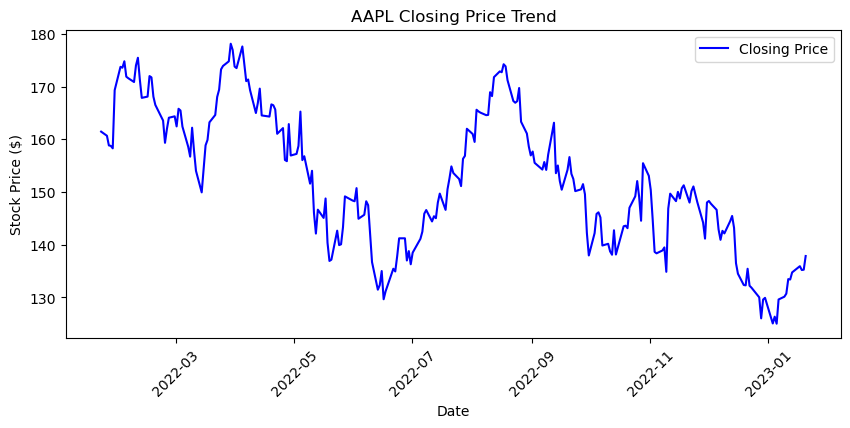

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(df.index, df['Close'], label="Closing Price", color='blue')
plt.xlabel("Date")
plt.ylabel("Stock Price ($)")
plt.title("AAPL Closing Price Trend")
plt.legend()
plt.xticks(rotation=45)
plt.show()



In [47]:
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()


In [49]:
df['Buy_Signal'] = (df['SMA_20'] > df['SMA_50']) & (df['SMA_20'].shift(1) <= df['SMA_50'].shift(1))
df['Sell_Signal'] = (df['SMA_20'] < df['SMA_50']) & (df['SMA_20'].shift(1) >= df['SMA_50'].shift(1))


In [53]:
df['Crossover'] = df['SMA_50'] > df['SMA_200']
print(df[['SMA_50', 'SMA_200', 'Crossover']].tail(30))  # Check last 30 rows


                               SMA_50     SMA_200  Crossover
Date                                                        
2022-12-07 05:00:00+00:00  145.172679  153.208448      False
2022-12-08 05:00:00+00:00  145.033842  153.124953      False
2022-12-09 05:00:00+00:00  145.032161  153.025717      False
2022-12-12 05:00:00+00:00  145.162539  152.927629      False
2022-12-13 05:00:00+00:00  145.227657  152.833098      False
2022-12-14 05:00:00+00:00  145.174696  152.736823      False
2022-12-15 05:00:00+00:00  144.981546  152.590273      False
2022-12-16 05:00:00+00:00  144.767963  152.435416      False
2022-12-19 05:00:00+00:00  144.618203  152.285091      False
2022-12-20 05:00:00+00:00  144.460454  152.153678      False
2022-12-21 05:00:00+00:00  144.394457  152.047273      False
2022-12-22 05:00:00+00:00  144.276840  151.897342      False
2022-12-23 05:00:00+00:00  144.058976  151.767612      False
2022-12-27 05:00:00+00:00  143.896559  151.647596      False
2022-12-28 05:00:00+00:0

In [55]:
print(df.isna().sum())  # Show missing values


Open              0
High              0
Low               0
Close             0
Volume            0
Dividends         0
Stock Splits      0
SMA_50           49
SMA_200         199
Buy_signal        0
Sell_signal       0
SMA_20           19
Buy_Signal        0
Sell_Signal       0
Crossover         0
dtype: int64


In [57]:
df.dropna(inplace=True)


In [59]:
df['Buy_Signal'] = (df['SMA_20'] > df['SMA_50']) & (df['SMA_20'].shift(1) <= df['SMA_50'].shift(1))
df['Sell_Signal'] = (df['SMA_20'] < df['SMA_50']) & (df['SMA_20'].shift(1) >= df['SMA_50'].shift(1))


In [61]:
print(f"Total Buy Signals: {df['Buy_Signal'].sum()}")
print(f"Total Sell Signals: {df['Sell_Signal'].sum()}")


Total Buy Signals: 2
Total Sell Signals: 2


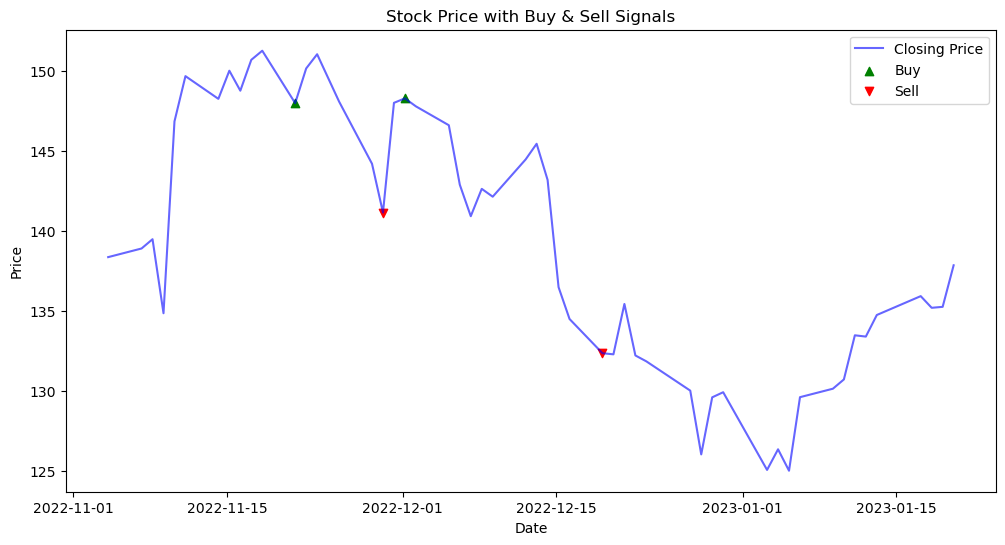

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label="Closing Price", color='blue', alpha=0.6)  # Price line

# Plot Buy signals
plt.scatter(df.index[df['Buy_Signal']], df['Close'][df['Buy_Signal']], label="Buy", marker="^", color='green', alpha=1)

# Plot Sell signals
plt.scatter(df.index[df['Sell_Signal']], df['Close'][df['Sell_Signal']], label="Sell", marker="v", color='red', alpha=1)

plt.title("Stock Price with Buy & Sell Signals")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


In [65]:
cash = 10000  # Starting money
shares = 0     # Number of shares owned

for i in range(len(df)):
    if df['Buy_Signal'].iloc[i]:  # Buy when signal is True
        shares = cash / df['Close'].iloc[i]  
        cash = 0  

    elif df['Sell_Signal'].iloc[i] and shares > 0:  # Sell when signal is True
        cash = shares * df['Close'].iloc[i]  
        shares = 0  

print(f"Final Cash: ${cash:.2f}")


Final Cash: $8512.76


In [67]:
from sklearn.metrics import accuracy_score

df['Strategy_Returns'] = df['Close'].pct_change() * df['Buy_Signal'].shift(1)
cumulative_returns = (1 + df['Strategy_Returns']).cumprod()

print(f"Total Return: {cumulative_returns.iloc[-1]:.2f}")


Total Return: 1.01


In [69]:
buy_and_hold_return = df['Close'].iloc[-1] / df['Close'].iloc[0]
print(f"Buy & Hold Return: {buy_and_hold_return:.2f}")



Buy & Hold Return: 1.00


In [71]:
short_windows = [10, 20, 30]
long_windows = [50, 100, 200]

for short in short_windows:
    for long in long_windows:
        if short < long:
            df[f'SMA_{short}'] = df['Close'].rolling(window=short).mean()
            df[f'SMA_{long}'] = df['Close'].rolling(window=long).mean()
            df['Buy_Signal'] = (df[f'SMA_{short}'] > df[f'SMA_{long}']) & (df[f'SMA_{short}'].shift(1) <= df[f'SMA_{long}'].shift(1))
            df['Sell_Signal'] = (df[f'SMA_{short}'] < df[f'SMA_{long}']) & (df[f'SMA_{short}'].shift(1) >= df[f'SMA_{long}'].shift(1))
            
            print(f"SMA {short}/{long} - Buy Signals: {df['Buy_Signal'].sum()}, Sell Signals: {df['Sell_Signal'].sum()}")


SMA 10/50 - Buy Signals: 0, Sell Signals: 0
SMA 10/100 - Buy Signals: 0, Sell Signals: 0
SMA 10/200 - Buy Signals: 0, Sell Signals: 0
SMA 20/50 - Buy Signals: 0, Sell Signals: 0
SMA 20/100 - Buy Signals: 0, Sell Signals: 0
SMA 20/200 - Buy Signals: 0, Sell Signals: 0
SMA 30/50 - Buy Signals: 0, Sell Signals: 0
SMA 30/100 - Buy Signals: 0, Sell Signals: 0
SMA 30/200 - Buy Signals: 0, Sell Signals: 0


In [89]:
stop_loss = 0.95
take_profit = 1.10

entry_price = 500
cash = 1000
shares = 5

for i in range(len(df)):
    if df['Buy_Signal'].iloc[i]:
        entry_price = df['Close'].iloc[i]
        shares = cash / entry_price
        cash = 0

    elif shares > 0:
        current_price = df['Close'].iloc[i]
        if current_price <= entry_price * stop_loss or current_price >= entry_price * take_profit:
            cash = shares * current_price
            shares = 0

print(f"Final Cash with Stop Loss & Take Profit: ${cash:.2f}")


Final Cash with Stop Loss & Take Profit: $691.90


##STOCK PRICE PREDICTION

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM ,Dropout
from sklearn.model_selection import train_test_split




df=pd.read_csv('../../Desktop/DATASET/algorithmictrading/aapl.csv',parse_dates=['Date'],index_col=['Date'])
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-21 00:00:00-05:00,163.471251,165.370233,161.363489,161.472855,122848900,0.0,0.0
2022-01-24 00:00:00-05:00,159.096650,161.363493,153.807340,160.687408,162294600,0.0,0.0
2022-01-25 00:00:00-05:00,158.062630,161.820817,156.113949,158.858017,115798400,0.0,0.0
2022-01-26 00:00:00-05:00,162.556552,163.441416,156.909335,158.768539,108275300,0.0,0.0
2022-01-27 00:00:00-05:00,161.512612,162.894591,157.366676,158.301254,121954600,0.0,0.0


In [8]:
data=df[['Close']].copy()

In [26]:
scaler=MinMaxScaler(feature_range=(0,1))
data_scaled=scaler.fit_transform(data)


In [28]:
def  create_sequences(data,time_step=50):
    X, y=[],[]
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), 0])
        y.append(data[i+time_step, 0])
    return np.array(X), np.array(y)


time_step = 50
X, y = create_sequences(data_scaled, time_step)

In [30]:
X= X.reshape(X.shape[0], X.shape[1], 1)


In [36]:
train_size = int(len(X) * 0.8)  # 80% training, 20% testing
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]



In [38]:
# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)), 
    Dropout(0.2),  
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),  
    Dense(1)  
])

# Compile Model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train Model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


C:\Users\SSD OS\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step - loss: 0.2531 - val_loss: 0.0528
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0610 - val_loss: 0.0435
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0338 - val_loss: 0.0138
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0289 - val_loss: 0.0129
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0325 - val_loss: 0.0217
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0224 - val_loss: 0.0314
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0200 - val_loss: 0.0283
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0195 - val_loss: 0.0175
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0175 - val_loss: 0.0160
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0195 - val_loss: 0.0200
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0186 - val_loss: 0.0214
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0172 - val_loss: 0.0164


In [40]:
import numpy as np
val_loss = 0.0138  # Your val_loss
rmse = np.sqrt(val_loss)
print(f'Validation RMSE: {rmse:.4f}')


Validation RMSE: 0.1175


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 385ms/step


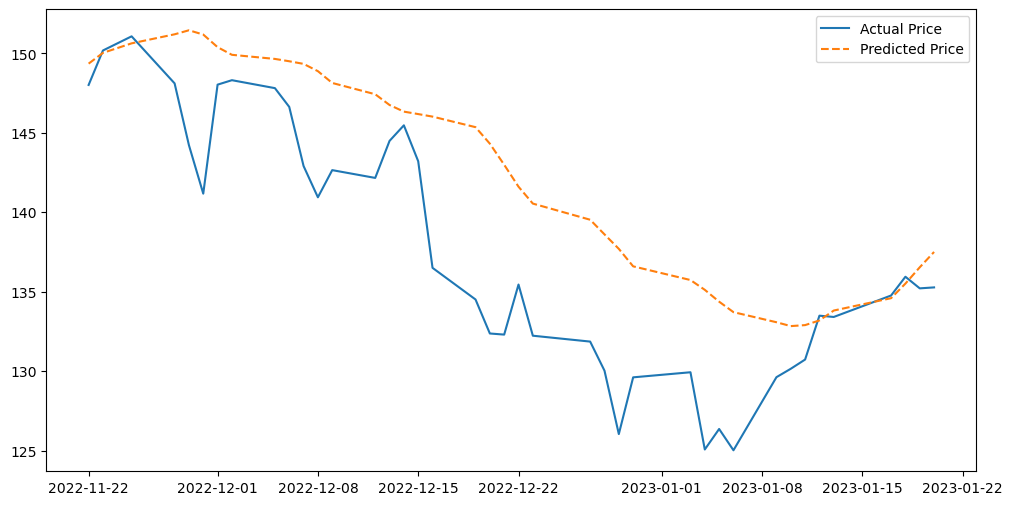

In [42]:
# Predict
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1,1))  # Convert back to original scale

# Plot Results
plt.figure(figsize=(12,6))
plt.plot(df.index[train_size+time_step+1:], scaler.inverse_transform(y_test.reshape(-1,1)), label="Actual Price")
plt.plot(df.index[train_size+time_step+1:], predictions, label="Predicted Price", linestyle="dashed")
plt.legend()
plt.show()
